**Importing important libraries**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from numpy import absolute
from sklearn.model_selection import RepeatedKFold

In [8]:
df=pd.read_csv("/content/instagram_reach.csv")

In [13]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [15]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

There is no null value in the data

**DATA CLEANING**

In [16]:
df1=df.copy()

In [18]:
df1.drop(["Unnamed: 0","S.No"],inplace=True ,axis=1)

In [19]:
df1=df1.dropna()

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           94 non-null     object
 1   Caption            94 non-null     object
 2   Followers          94 non-null     int64 
 3   Hashtags           94 non-null     object
 4   Time since posted  94 non-null     object
 5   Likes              94 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 5.1+ KB


In [23]:
Time_since_posted_in_hours=[]

for i in df1['Time since posted']:
    Time_since_posted_in_hours.append(i.replace('hours', ''))

df1.rename(columns={'USERNAME':'Username'}, inplace=True)
ser = pd.Series(Time_since_posted_in_hours)
df1['Times since posted (hours)'] = ser.values
df1['Times since posted (hours)'] = pd.to_numeric(df1['Times since posted (hours)'])
df1 = df1.drop('Time since posted', axis=1)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Username                    94 non-null     object
 1   Caption                     94 non-null     object
 2   Followers                   94 non-null     int64 
 3   Hashtags                    94 non-null     object
 4   Likes                       94 non-null     int64 
 5   Times since posted (hours)  94 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 5.1+ KB


**Performing EDA**

<ipython-input-27-7c45a7b0212f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Followers'])


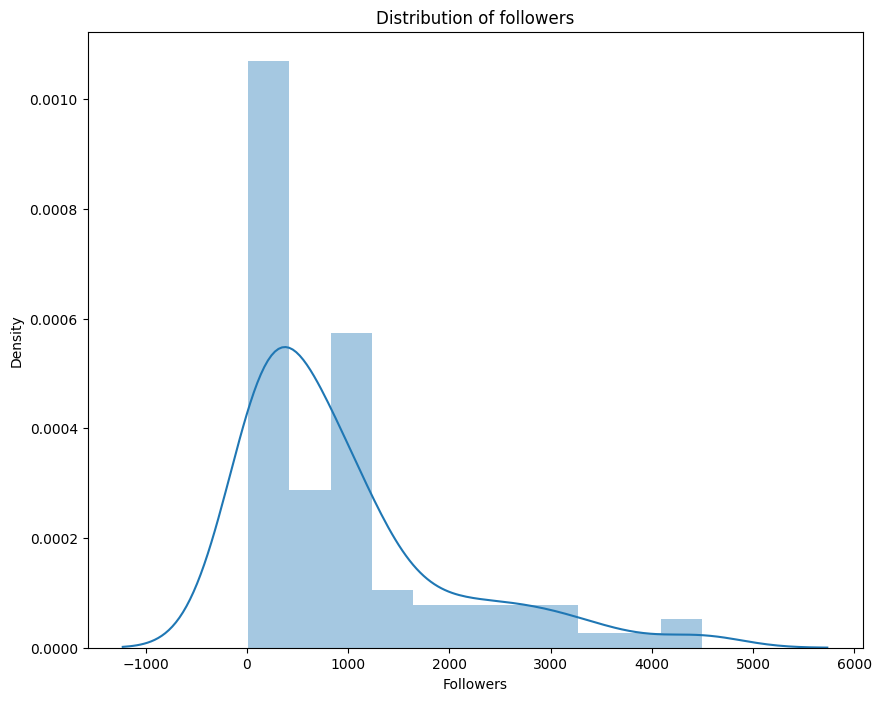

In [27]:
plt.figure(figsize=(10, 8))
sns.distplot(df1['Followers'])
plt.title("Distribution of followers")
plt.show()

the distribution of followers is right skewed

<ipython-input-28-0bf592e67996>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Likes'])


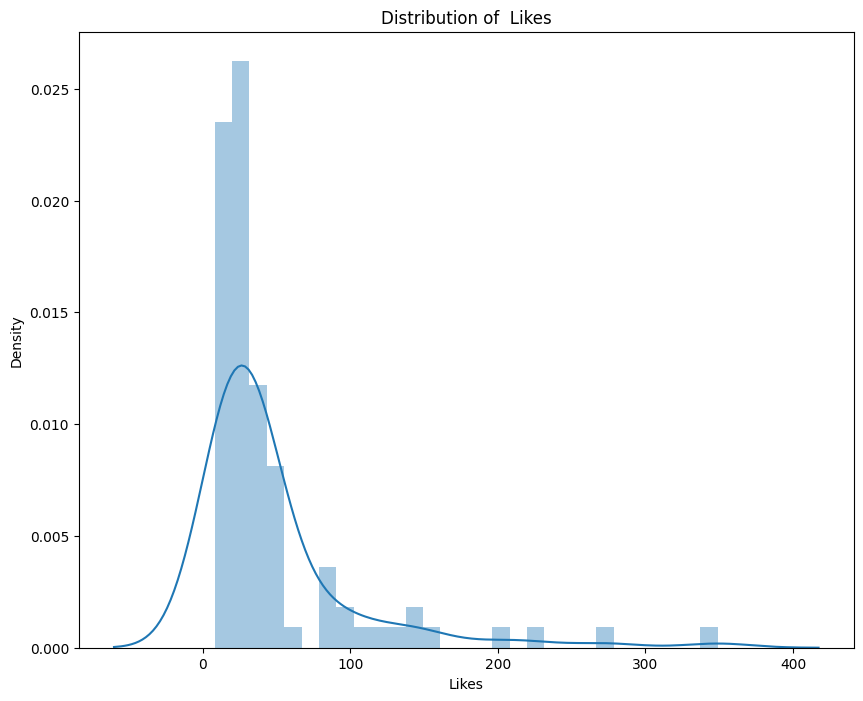

In [28]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of  Likes")
sns.distplot(df1['Likes'])
plt.show()

**Likes Vs Follower**

In [30]:
figure = px.scatter(data_frame = df1, x="Likes",
                    y="Followers", trendline="ols", 
                    title = "Relationship Between Likes and Followers")
figure.show()

In [32]:
figure = px.scatter(data_frame = df1, x="Times since posted (hours)",
                    y="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Followers")
figure.show()

**Finding Corelation**

<ipython-input-54-5212f637f5b9>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



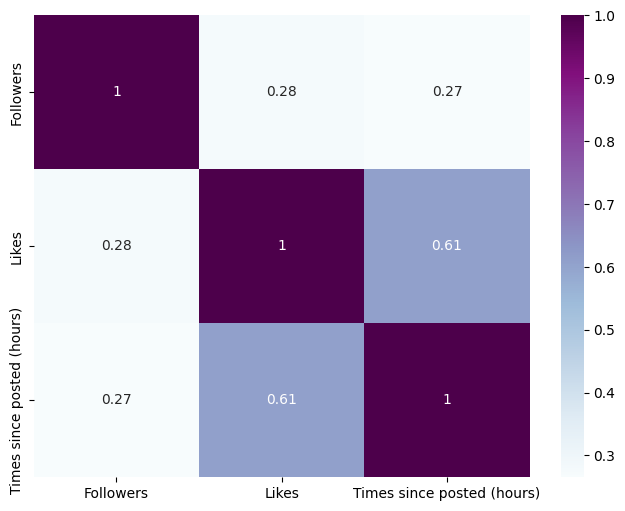

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(df1.corr(), cmap="BuPu", annot=True)
plt.show()

Building Models

In [35]:
#Define x variables and y variable
x = df1[['Followers', 'Times since posted (hours)']]
y = df1['Likes']
df.head()

#Split train set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Using Linear Regression**

In [41]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
scores = cross_val_score(lin_reg, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean Absaolute Error: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean Absaolute Error: 17.737 (11.099)


In [43]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

Using Gradient Boosting Regressor

In [52]:

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
scores = cross_val_score(gbr, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 22.990 (19.302)
